\newpage

## Question 1


1. For this assignment we use [Wine Quality Dataset on Kaggle](https://www.kaggle.com/datasets/rajyellow46/wine-quality)\
While information about this dataset from [Cortez et al., 2009]


2. Load the dataset into a pandas DataFrame for analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wine = pd.read_csv('/Users/lingyunhuang/Desktop/3da_files/assignment_3/winequalityN.csv')
# Check the dataset
wine.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


3. Perform an initial exploration of the dataset to understand its structure (the number of features, observations, and variable types). Write about at least two findings.

In [3]:
print(wine.shape)
print(wine.dtypes)

(6497, 13)
type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


There are 6497 observations (rows) and 13 variables (columns).\
For types of 13 variables, `type` is object, `fixed acidity`, `volatile acidity`, `citric acid`, `residual sugar`, `chlorides`,
`free sulfur dioxide`,
`total sulfur dioxide`,
`density`,
`pH`,
`sulphates` and
`alcohol` are float64,
`quality` is int64                 

4. Generate summary statistics for the dataset. Comment on the results (at least two statements). 

In [4]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Counts between different variables are different, this reveals that missing value may exist, Further investigation into these missing values is necessary.\
The mean of total sulfurdioxide is around 115.74 and mean of ph is around 3.22. By standardizing the data, we can ensure that each feature contributes equally to the analysis, regardless of its original scale or units. Dataset needs standardization.\
Outlier: There are potential outliers in some features, particularly in residual sugar and possibly in chlorides and total sulfur dioxide, given the notable differences between the 75th percentile and the maximum values. There may be extreme values in these variables that could skew analyses. Further investigation into these outliers is necessary.

5. Visualize the distribution of wine quality ratings. Comment on the plot (at least one statement).

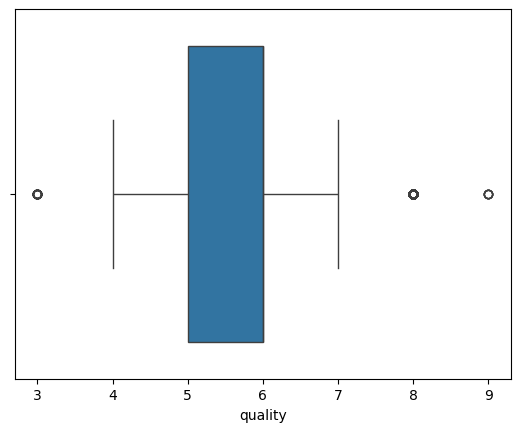

In [5]:
sns.boxplot(
    x = 'quality',
    data = wine
)
plt.show()

<Axes: xlabel='quality', ylabel='count'>

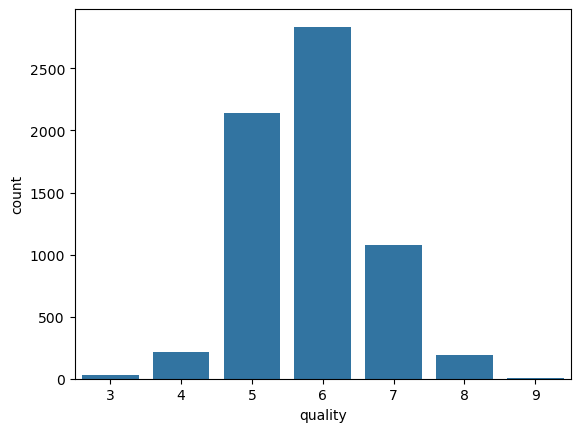

In [6]:
sns.countplot(
    data=wine,
    x = 'quality'
)

By visualizing the distribution of wine quality ratings, we can observe that the distribution follows a bell-shaped curve, indicating a potential fit to a normal distribution. Additionally, we can see that some quality ratings exceed Q3 + 1.5(Q3 - Q1) or lower than Q1 - 1.5(Q3 - Q1), suggesting the presence of outliers.

6. Drop the observations with quality scores less than or equal to four and greater than or equal to eight. Use this subset of the dataset for the following analysis.

In [7]:
# scores less than or equal to 4 and greater than or equal to 8
wine_subset = wine[(wine['quality'] > 4) & (wine['quality'] < 8)]
wine_subset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


7. How many observations and unique quality scores are in the filtered data?

In [8]:
# num of observations
print(wine_subset.shape)

# num of unique quality score
print(wine_subset['quality'].nunique())

(6053, 13)
3


There are 6053 observations and 3 unique quality scores in the filtered data

8. Create a correlation heatmap. Describe any correlations between features using a correlation matrix (at least two statements). 

In [9]:
wine_subset_corr = wine_subset.drop(['type', 'quality'], axis =1)
wine_subset_corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


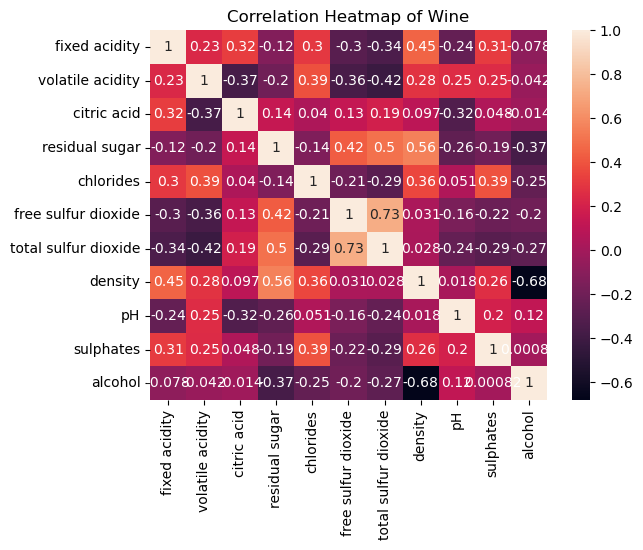

In [10]:
sns.heatmap(wine_subset_corr.corr(), annot=True)
plt.title('Correlation Heatmap of Wine')
plt.show()

From the heatmap and correlation matrix, we can observe that the correlation coefficient between `free sulfur dioxide` and `total sulfur dioxide` is 0.73, indicating a relatively strong positive relationship between these two elements.

Moreover, the correlation coefficient between `alcohol` and `density` appears to be the darkest in color, at -0.68. This suggests a strong negative correlation between these two variables.

It also reveals that there is no relation between `alcohol` and `sulphates` since their correlation coefficient is 0.0008.

9. Are there any missing values? If you identify any, drop those observations with the missing values.

In [11]:
# check the missing value
missing_val = wine_subset.isnull()
missing_val.sum()

type                    0
fixed acidity           9
volatile acidity        8
citric acid             3
residual sugar          2
chlorides               1
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      9
sulphates               3
alcohol                 0
quality                 0
dtype: int64

In [12]:
# drop the missing values
wine_subset = wine_subset.dropna()

Yes there are missing values. In `fixed acidity` and `pH` there are 9 missing vlues, in `volatile acidity` there are 8 missing values.

10. In this assignment, skip the outlier analysis. Standardize the predictor variables (don't use the `type` variable) to ensure they are on the same scale. Why is standardizing predictor variables crucial when using the K-Nearest Neighbors (KNN) classifier? 

In [13]:
from sklearn import neighbors
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [14]:
x = wine_subset.drop(['type', 'quality'], axis =1)
y = wine_subset.quality
# scaling each column independently
x = scale(x, axis=0)

Standardizing predictor variables is crucial when using the K-Nearest Neighbors (KNN) classifier because KNN relies on measuring distances between data points to determine classification. If the predictor variables are not on the same scale, variables with larger magnitudes may disproportionately influence the distance calculation, leading to biased results. Standardizing the predictor variables ensures that each variable contributes equally to the distance calculation. Additionally, normalization will be greatly influenced by outliers, since we do not do outlier analysis, standardization will be a better choice.

11. Split the dataset into a training set(75\%) and a testing set (25\%).

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y, 
    test_size=0.25, 
    random_state=0, 
    stratify=y
    )

12. Implement the KNN classifier using `scikit-learn`. Start with k=5.

In [16]:
# Let K = 5
knn5 = neighbors.KNeighborsClassifier(
    n_neighbors = 5,
    algorithm='brute'
    )

13. Train the model on the training set and make predictions on the test set.

In [17]:
# train the model
knn5.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [18]:
# predict on the test set
pred5 = knn5.predict(x_test)
pred5[1:5]

array([6, 5, 5, 6])

14. Calculate the accuracy of the model. Discuss the model's performance (compare the model's performance to flipping a coin)

In [19]:
# accuracy on the test set
print(round(metrics.accuracy_score(y_test, pred5),2))

0.6


The score is 0.6, Only $~60\%$ of the observations are correctly predicted, which is not that high. Compared to flipping a coin,this model's performance is not a better classifier than flipping a coin.

15. Generate a confusion matrix. Describe the confusion matrix (what are rows and columns?).

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
wine_conf_matrix = confusion_matrix(y_test, pred5)
wine_conf_matrix

array([[342, 180,  10],
       [186, 444,  75],
       [ 35, 119, 115]])

In the first row of the confusion matrix, there are 342 observations that are correctly classified in the first column, while the second and third columns are misclassified. In the second row, there are 444 observations correctly classified in the second column. In the third row, 115 observations are correctly classified in the third column, while there are 35 and 119 observations misclassified in the first and second columns respectively.

16. Discuss any potential improvements based on the accuracy and confusion matrix.

We only test when K = 5, we can try different K, from 1 to 8 to find out the best test accuracy to improve the model.

17. Experiment with different values of $K$ to find the optimal number of neighbors for the KNN classifier.

In [22]:
k_range = range(1, 8)
scores = [] 

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(round(metrics.accuracy_score(y_test, y_pred),2))

18. Plot the relationship between $K$ and model accuracy.

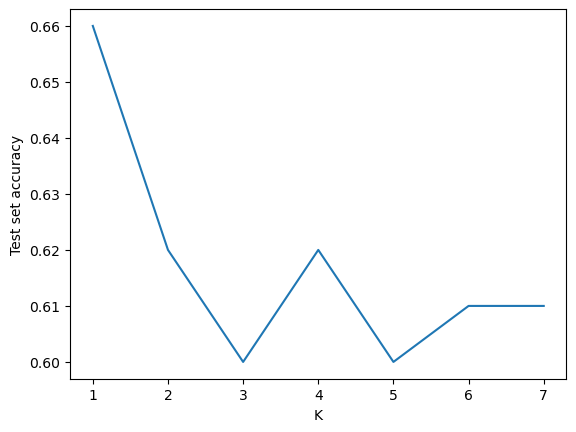

In [23]:
plt.plot(k_range, scores)
plt.xlabel('K')
plt.ylabel('Test set accuracy')
plt.xticks(range(1,8))
plt.show()

19. Select the best $K$ value and explain why it is optimal.

The best $K$ value is 4. This is determined based on the test accuracy score, which reaches its highest value at $K = 4$, approximately 0.62. As $K$ increases from 1 to 3, the test accuracy steadily decreases. However, at $K = 4$, the test accuracy increases to 0.62. Beyond $K = 4$, for $K$ values from 5 to 8, the test accuracy remains consistently lower than 0.62. Therefore, $K = 4$ is considered the optimal number because it yields the highest test accuracy score compared to other $K$ values tested, leading to better performance in the classification task.

20. Reflect on the performance of the KNN algorithm for this particular dataset.

The accuracy achieved by the KNN algorithm, particularly with the optimal $K$ value of 4, is around 0.62. This means that the algorithm correctly predicts the class labels for approximately 62% of the instances in the dataset. The test accuracy is not high, there is room for improvement. Also, KNN algorithm may struggle to achieve higher accuracy due to the complexity or nature of the dataset.

21. Propose at least two ways the model performance could be further improved.

Outlier: We did not do outlier analysis, this may lead to low test accuracy. we can do outlier analysis for every variables. After outlier analysis and treatment, the dataset can be reevaluated using the KNN algorithm to assess whether the test accuracy improves.

Experiment with different distance metrics and weighting schemes in the KNN algorithm to optimize performance. We can try k-fold cross-validation, k-mean, etc.

There are many variables in the dataset. Before applying KNN, we could try Principal Component Analysis (PCA) to reduce the dimensionality, which may help increase the test accuracy of KNN.

\newpage

## 3. Helper's name.

N/A

\newpage

## Reference 
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.\
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.